# FMSF80 - Datorlaboration 2
## Syfte
Syftet med dagens laborationen är att du skall:
*   Få förståelse för diskreta, bivariata och betingade fördelningar.
*   Förstå hur simuleringar kan användas för att illustrera komplexa fördelningar.
*   Bli bekant med summor av stokastiska variabler.
*   Få förståelse för hur och när centrala gränsvärdessatsen kan användas.

# Bakgrund
Laborationen består av två delar. Först studerar vi hur en bivariat diskret fördelning kan konstrueras från enklare delkomponenter och undersöker de resulterande marginal och betingade fördelningar. Därefter undersöker vi summor av stokastiska variabler och centrala gränsvärdessatsen.

## En modell för skördeutfall
 I första delen av laborationen kommer vi att studera en enkel modell för skördeutfall. Frågan är hur stor skörd man kan förvänta sig om man planterar $n$ st frö. För att modellera skördeutfallet kan vi dela upp problemet i två steg:
1. Först konstruerar vi en modell för antalet av de planterade fröna som gror.
2. Därefter funderar vi på hur stort skördeutfallet (antal nya frö) blir om precis $k$ st frö gror.

Den resulterande modellen består nu av en fördelning för antalet frö $p_X(k)$ och en betingad fördelning för skördeutfallet, $p_{Y|X=k}(l|k)$. Bayessats och satsen om total sannolikhet ger oss nu den gemensam fördelningen för antalet frö som gror och skördeutfallet samt marginal fördelningen för skördeutfallet.

$p_{Y|X=k}(l|k) = p_X(k) \cdot p_{Y|X=k}(l)$ och $p_Y(l) = \sum_k p_X(k) \cdot p_{Y|X=k}(l)$

Utöver dessa fördelningar är även den betingade fördelningen för $X$ givet $Y$ intressant, $p_{X|Y=l}(k|l)$. Om vi enbart observerar den totala skörden $y$ så kan denna fördelning användas för att säga något om hur många frö som faktiskt grott.

## Förberedelseuppgifter
1.   Förvissa dig om att du förstår vad en sannolikhetsfunktion är
2.   **Mozquizto:** Vi planterar 7 frö med grobarhet 75%. Ange fördelningen för antalet frön
som kommer att gro (om de gror oberoende av varandra) samt fördelningens väntevärde och varians.
3.   **Mozquizto:** Om $X_i \in \text{Po}(\mu_i)$ och oberoende vilken fördelning har då summan $Y = \sum_{i=1}^{n}X_i$?
4.   Förvissa dig om att du förstår hur total sannolikhet fungerar för väntevärde, d.v.s. hur man kan beräkna $\text{E}(Y) = \text{E}(\text{E}(Y|X))$.
5.   **Mozquizto:** Förvissa dig om att du förstår vad Centrala gränsvärdessatsen innebär och när den kan användas.
6.   Vi beräknar medelvärdet $\bar{X}$ av oberoende s.v. $X_i \in \text{Po}(3), i = 1,..., n$ (samma väntevärde för alla $X_i$). Ange väntevärde och varians för $\bar{X}$. Vilken fördelning får $\bar{X}$ (approximativt) när $n$ är stort? Ungefär hur stort måste $n$ vara för att approximationen ska bli bra?

# Importera moduler och ladda upp filer till Colab
Kör koden nedan för att hämta de väsentliga modulerna vi kommer att använda i laborationen.

In [1]:
# Importerar moduler
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#för icke colabs (antar att harvest.py ligger i samma katalog)
from harvest import harvest

# Modell för skördeutfall
## Diskret variabel: Antal frö som gror
 Vi vill simulera antalet frön som kommer att gro bland de sju planterade fröna. Det kan vi göra
 på två sätt. Det mest rättframma är att simulera 7 frön och räkna antalet som gror. Funktionen

In [3]:
stats.uniform.rvs(size=7)

array([0.05755603, 0.78143295, 0.40813889, 0.70484269, 0.04055015,
       0.61158457, 0.29036791])

ger en array med **size** rektangelfördelade slumptal, $U$, mellan 0 och 1. För att sannolikheten att ett frö kommer att gro skall bli $p$ kan vi helt enkelt se efter om $U \leq p$. I så fall kommer fröet att gro. Om $U > p$ så kommer det inte att gro. För att få reda på antalet frön som kommer att gro bland de 7 summerar vi den resulterande 0/1-variabeln:

In [4]:
p = 0.75
n = 7
U = stats.uniform.rvs(size=n)
print('U :', U)
mask = U <= p
print('U<=', p, ':', mask)
X = int(mask.sum())
print('Antal frö som gror', X)
print('Andel som gror:', X / n)


U : [0.96474973 0.64507921 0.4198233  0.50938489 0.98468393 0.61745107
 0.90903941]
U<= 0.75 : [False  True  True  True False  True False]
Antal frö som gror 4
Andel som gror: 0.5714285714285714


**Uppgift:** Jämför resultatet av **U = stats.uniform.rvs(size=?)** och **U<=p** och förvissa dig om att du förstår vad som hände.

 För att illustrera vad som händer så kan vi också plotta slumptalen och den sannolikhet som vi jämför med.

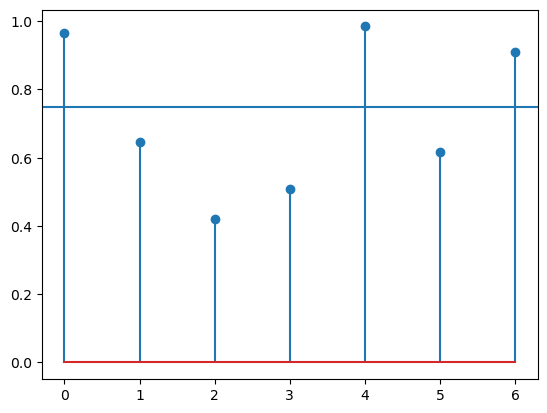

In [5]:
# Plot
plt.stem(U)
plt.axline((0,p), slope=0) #linje från punkten (0,p) med lutning 0

**Mozquizto:** Hur många frön grodde?

 Ett smidigare sätt är att utnyttja att vi vet att antalet frön som kommer att gro är $\text{Bin}(n,p)$-fördelat. Vilket vi kan simulera med **stats.binom**, först undersöker vi hjälp texten för att förstå funktionen

In [6]:
help(stats.binom)

Help on binom_gen in module scipy.stats._discrete_distns:

<scipy.stats._discrete_distns.binom_gen object>
    A binomial discrete random variable.

    As an instance of the `rv_discrete` class, `binom` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.

    Methods
    -------
    rvs(n, p, loc=0, size=1, random_state=None)
        Random variates.
    pmf(k, n, p, loc=0)
        Probability mass function.
    logpmf(k, n, p, loc=0)
        Log of the probability mass function.
    cdf(k, n, p, loc=0)
        Cumulative distribution function.
    logcdf(k, n, p, loc=0)
        Log of the cumulative distribution function.
    sf(k, n, p, loc=0)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(k, n, p, loc=0)
        Log of the survival function.
    ppf(q, n, p, loc=0)
        Percent point function (inverse of `

Sen simulerar vi ett tal från en $\text{Bin}(n,p)$-fördelning.

In [8]:
X = stats.binom.rvs(n, p)
print(X)

4


**Uppgift:** Gör om simuleringen några gånger om. Hur många frön brukar gro?

 Antalet frön som kommer att gro varierar uppenbarligen från gång till gång. För att se hur vanligt det är med olika antal frön som kommer att gro simulerar vi $N = 100$ planterings tillfällen.

In [9]:
n = 7
p = 0.75
N = 100;  #antal sampel
#simulera från binomalfördelningen
X = stats.binom.rvs(n, p, size=N)
print(X)

[5 7 6 3 5 7 6 6 3 5 5 5 7 6 3 5 6 6 5 6 7 6 7 6 5 3 3 7 5 6 5 5 6 5 6 4 5
 5 4 6 5 5 7 6 5 6 4 6 5 6 6 7 5 5 6 5 2 7 7 6 6 5 5 5 5 3 3 6 5 6 6 4 5 7
 4 5 2 7 4 7 7 6 7 6 4 5 5 3 3 5 5 6 6 5 5 5 5 6 5 4]


Vi kan beräkna antal värden av varje typ (dvs antal 0:or, antal 1:or, etc.)

In [10]:
#notera att vi vill ha n+1 lådor (0,1,2,...,n)
(antal,varden) = np.histogram(X, bins=n+1, range=(0,n+1))

#antal samplade 3:or
print('antal 3:or:', sum( X==3 ))
#Värdena finns nu i vektorn varden och i vektorn antalet finns i antal av repsketive värde
print('Antal värden =', varden[3], 'enligt np.histogram:', antal[3])

antal 3:or: 9
Antal värden = 3.0 enligt np.histogram: 9


Vi kan illustrera fördelningen med ett stolpdiagram (vi har ju en diskret variabel). I **sns.histplot** anger vi gränser för indelningen och bredd på varje låda, t.ex. så vill vi ha värdena $x=0$ i intervallet $(-0.5,\,0.5)$.

Text(0.5, 0, 'Antal försök')

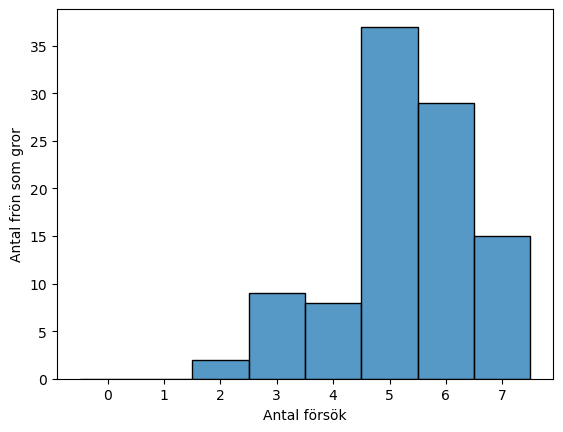

In [11]:
sns.histplot(X, binwidth=1, binrange=(-0.5,n+0.5))
plt.ylabel('Antal frön som gror')
plt.xlabel('Antal försök')

**Uppgift:** Var det någon av planteringstillfällen som inte hade några groende frön alls?

**Uppgift:** Hur många av planteringstillfällen gav 5 groende frön? Hur många gav högst 2 groende frön?

Vi vill nu jämföra våra 100 påsar med den teoretiska sannolikhetsfunktionen. För att göra det måste vi skala om y-axeln till andelar (Notera att **res.plot** automatisk adderar en förklaring av färgerna.).

<Axes: xlabel='x'>

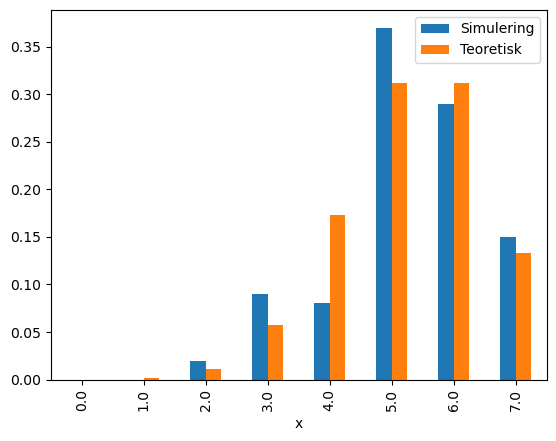

In [12]:
#binomial sannolikhets funktion beräknad för samma lådor som ovan
pmf = stats.binom.pmf(varden[0:n+1], n, p) 
#Det är enklast att lägga samman alla data i en pandas data.frame
res = pd.DataFrame({'x':varden[0:n+1],
                    'Simulering': antal/sum(antal), #dela med totalen för att få andel
                    'Teoretisk': pmf})
#och sen plotta
res.plot(x='x',y=['Simulering','Teoretisk'], kind='bar')

**Mozquizto:** Hur stämmer andelen av de simulerade planterings tillfällena som hade precis $5$ groende frön eller högst $2$ groende frön med motsvarande sannolikheter? (Jämför med resultatet från **stats.binom.pmf** och **stats.binom.cdf**).


In [13]:
stats.binom.pmf(varden[0:n+1], n, p)

array([6.10351562e-05, 1.28173828e-03, 1.15356445e-02, 5.76782227e-02,
       1.73034668e-01, 3.11462402e-01, 3.11462402e-01, 1.33483887e-01])

In [14]:
stats.binom.cdf(varden[0:n+1], n, p)

array([6.10351562e-05, 1.34277344e-03, 1.28784180e-02, 7.05566406e-02,
       2.43591309e-01, 5.55053711e-01, 8.66516113e-01, 1.00000000e+00])

**Mozquizto** Experimentera med att ändra grobarheten från $p = 0.75$ och antalet frön från $n =
 7$. Hur ändrar sig fördelningen när $n$ eller $p$ minskar eller ökar?

<Axes: xlabel='x'>

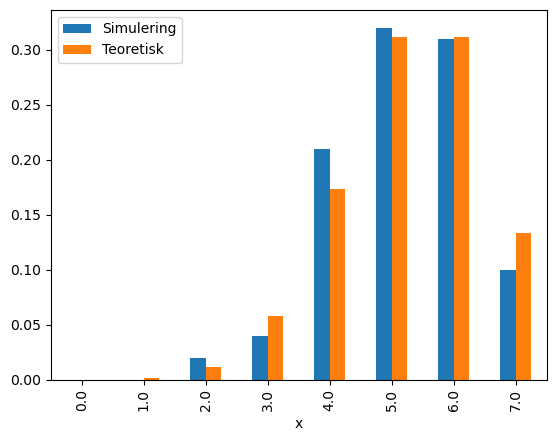

In [15]:
n = 7
p = 0.75
#simulera från binomalfördelningen
X = stats.binom.rvs(n, p, size=100)
#räkna antal
(antal,varden) = np.histogram(X, bins=n+1, range=(0,n+1))
#Läg samman alla data i en pandas data.frame
res = pd.DataFrame({'x':varden[0:n+1],
                    'Simulering': antal/sum(antal), #dela med totalen för att få andel
                    'Teoretisk': stats.binom.pmf(varden[0:n+1], n, p) })
#och sen plotta
res.plot(x='x',y=['Simulering','Teoretisk'], kind='bar')

## Centrala gränsvärdessatsen för binomialfördelning
Om $np(1-p) > 10$ kan binomialfördelningen approximeras med en normalfördelning. Vi kan jämföra fördelningsfunktionerna och se hur bra det blir:

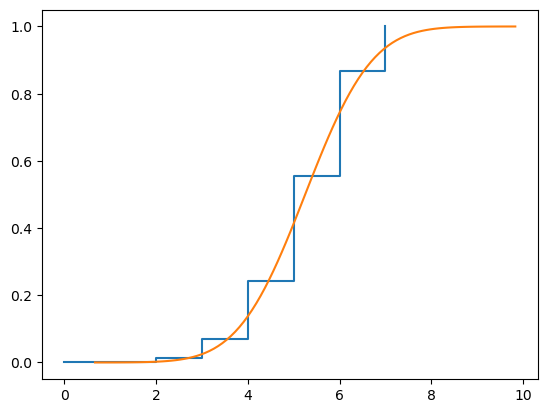

In [16]:
n = 7
p = 0.75
E = n * p             # väntevärde i binomialfördelning (använd n och p)
V = n * p * (1-p)              # varians i binomialfördelning (använd n och p)

#Skappa en vektor för den kontinuerliga variablen som är mu+/-4*sigma, 100 values
x1 = np.linspace(E-4*np.sqrt(V),E+4*np.sqrt(V), 100)
#och en vektor [0,1,2,...,n] för den diskreta tätheten
x2 = np.arange(n+1)

plt.step(x2, stats.binom.cdf(x2, n, p), where='post')
plt.plot(x1, stats.norm.cdf(x1, E, np.sqrt(V)))      #tips: np.sqrt ger roten ur

**Uppgift:** Pröva med lite olika värden på $n$ och $p$. Testa både när det går bra att normalapproximera och när det inte går.

**Mozquizto:** Beräkna sannolikheten att högst 2 frön gror, både exakt och med normalapproximation.

In [17]:
stats.norm.cdf(x1, E, np.sqrt(V))

array([3.16712418e-05, 4.44231742e-05, 6.19233895e-05, 8.57837169e-05,
       1.18103990e-04, 1.61598982e-04, 2.19751580e-04, 2.96995550e-04,
       3.98931102e-04, 5.32576001e-04, 7.06654332e-04, 9.31923968e-04,
       1.22154241e-03, 1.59146888e-03, 2.06089818e-03, 2.65271952e-03,
       3.39398992e-03, 4.31640908e-03, 5.45677857e-03, 6.85742491e-03,
       8.56656243e-03, 1.06385691e-02, 1.31341457e-02, 1.61203278e-02,
       1.96703190e-02, 2.38631167e-02, 2.87829020e-02, 3.45181740e-02,
       4.11606119e-02, 4.88036603e-02, 5.75408414e-02, 6.74638118e-02,
       7.86601927e-02, 9.12112197e-02, 1.05189266e-01, 1.20655313e-01,
       1.37656443e-01, 1.56223449e-01, 1.76368649e-01, 1.98084004e-01,
       2.21339621e-01, 2.46082740e-01, 2.72237254e-01, 2.99703828e-01,
       3.28360643e-01, 3.58064784e-01, 3.88654236e-01, 4.19950465e-01,
       4.51761512e-01, 4.83885505e-01, 5.16114495e-01, 5.48238488e-01,
       5.80049535e-01, 6.11345764e-01, 6.41935216e-01, 6.71639357e-01,
      

In [18]:
stats.binom.cdf(x2, n, p)

array([6.10351562e-05, 1.34277344e-03, 1.28784180e-02, 7.05566406e-02,
       2.43591309e-01, 5.55053711e-01, 8.66516113e-01, 1.00000000e+00])

## Simulering med hjälp av betingad fördelning: Skördeutfall
Vi tänker oss nu att varje frö som gror ger upphov till ett Poissonfördelat antal nya frön, i medeltal $10$ frön per groende ursprungligt frö. Frön som inte gror ger naturligtvis inga nya frön. Vi är intresserade av fördelningen för det totala antalet nya frön som erhålls om vi planterar $7$ frön med $75\%$ grobarhet.

Sedan tidigare har vi att $X$ = ”antal frön som gror” $\in \text{Bin}(7,0.75)$. Om exakt $X = k$ frön grodde
blir $Y$ = ”antal nya frön” en summa över antalet frö från $k$ st oberoende plantor. D.v.s. Summan av $k$ stycken oberoende $\text{Po}(10)$-fördelade variabler, en för varje groende frö:

$Y = \sum_{i=0}^{k}Z_i$ där $Z_i \in \text{Po}(10)$

 Från förberedelseuppgifterna har vi då att fördelningen för $Y|X=k\in\text{Po}(10\cdot k)$ där $k = 0,...,7$. Fördelningen för $Y$ ges då av (Satsen om Total Sannolikhet)

$p_Y(l) = \sum_{k=0}^{7} p_{Y|X=k}(l) \cdot p_X(k) = \sum_{k=0}^{7}\frac{(10\cdot k)^l}{l!}\cdot e^{-10\cdot k}\cdot \binom{7}{k}\cdot 0.75^k\cdot 0.25^{7-k}$

För att ta reda på hur denna fördelning ser ut studerar vi först det enklare fallet med enbart $n = 2$
planterade frön. Först illustrerar vi sannolikheten att 0, 1 eller 2 frö gror.

Text(0, 0.5, 'p(x)')

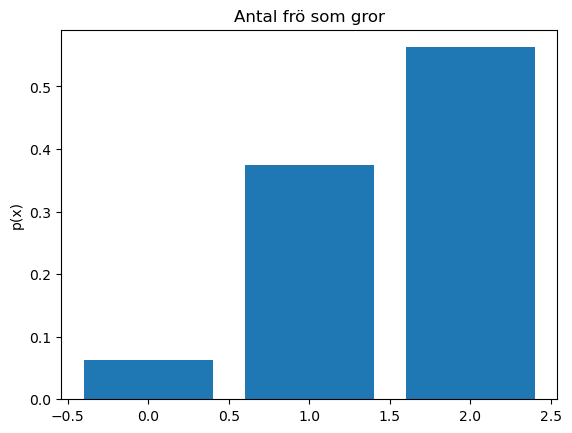

In [19]:
#parametrar för binomial fördelningen
n = 2
p = 0.75

#och x-vektor för binomialfördelningen (vi har ju att k=0,1,...,n)
x = np.arange(n+1)

#Plotta binomialfördelningen
plt.bar(x, stats.binom.pmf(x, n, p))
plt.title('Antal frö som gror')
plt.ylabel('p(x)')

 Därefter illustrerar vi de tre olika varianterna av betingade fördelningar: $\text{Po}(0)$, $\text{Po}(10)$, $\text{Po}(20)$.

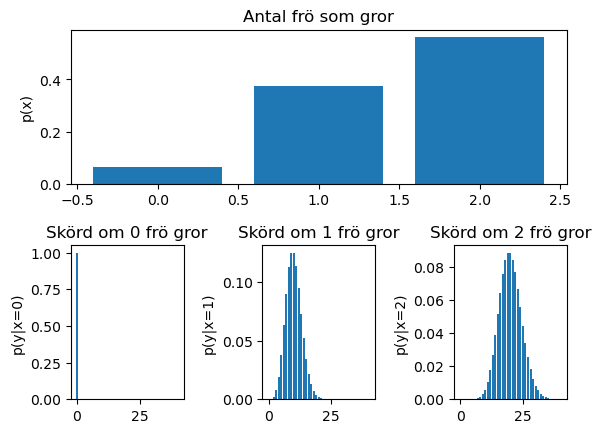

In [20]:
#parametrar och x-vektor för binomial fördelningen
n = 2
p = 0.75
x = np.arange(n+1)

# parametrar och y-vektor för poisson
mu = 10
y = np.arange(4*mu+1)

## plottar
#Först binomial fördelning med n=2
ax = plt.subplot(2,1,1) #första ploten ska vara hela övre raden
ax.bar(x, stats.binom.pmf(x, n, p))
ax.set_title('Antal frö som gror')
ax.set_ylabel('p(x)')

#Sen poisson fördelning för x=0, 1 och 2. Vi gör beräkningarna genom att loopa över i=0,1,2
for i in range(3):
    ax = plt.subplot(2,3,4+i)
    ax.bar(y, stats.poisson.pmf(y, i*mu))
    ax.set_title('Skörd om ' + str(i) + ' frö gror')
    ax.set_ylabel('p(y|x=' + str(i) + ')')

#justera plottar så att texten inte överlappar
plt.subplots_adjust(wspace=0.7, hspace=0.4)

**Mozquizto:**  Hur ändrar sig den betingade fördelningen för $Y$ givet $X$ när antalet groende frön ändrar sig?

**Uppgift:**  Tänk efter hur fördelningen för $Y$ borde se ut, när vi viktat ihop dessa 3 fördelningar med vikter enligt binomialfördelningen för antalet groende frön.

 För att undersöka hur $Y$ borde se ut kan vi simulera från fördelning. Först använder vi **stats.binom.rvs**  för att dra 1000 sampel som illustrerar hur många av våra 2 frö som gror i olika försök.

<Axes: ylabel='Density'>

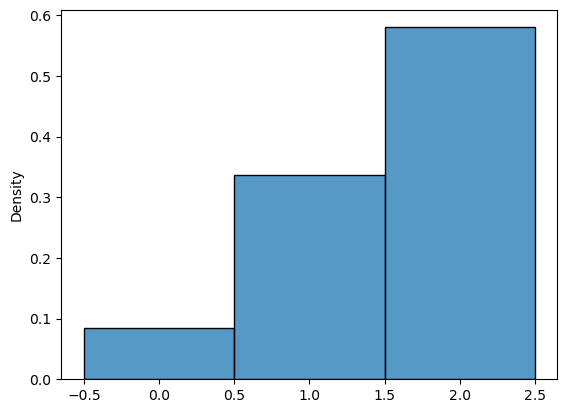

In [21]:
# Simulera N fall
N = 1000
n = 2
p = 0.75
X = stats.binom.rvs(n, p, size=N)

#antal frö som gror
sns.histplot(X, binwidth=1, binrange=(-0.5,n+0.5), stat='density')

Givet att $X = k$ frö gror så vet vi att det betingade antalet nya frö nu är $Y|X = k\in \text{Po}(10\cdot k)$.
Eftersom vi simulerat antalet frö som gror ovan så kan vi för varje fall simulera det betingade antalet nya frö.

<Axes: ylabel='Density'>

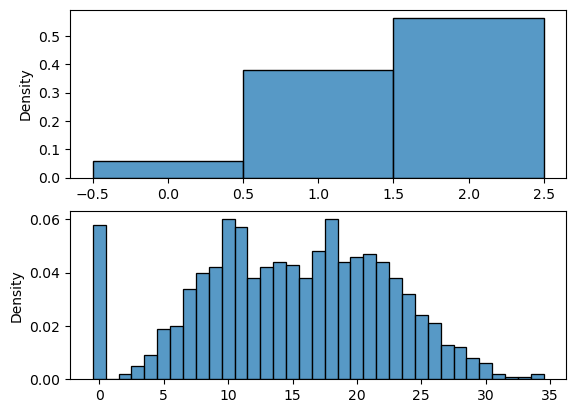

In [22]:
#N fall
N = 1000
#simulera antal frö som gror
n = 2
p = 0.75
X = stats.binom.rvs(n, p, size=N)
# simulerad skörd
mu = 10
Y = stats.poisson.rvs(mu*X)
#antal frö som gror och simulerad skörd
ax = plt.subplot(211)
sns.histplot(X, binwidth=1, binrange=(-0.5,n+0.5), stat='density')
ax = plt.subplot(212)
sns.histplot(Y, binwidth=1, binrange=(-0.5,max(Y)+0.5), stat='density')

 I det här fallet kan vi faktiskt använda satsen om total sannolikhet för att låta $\texttt{python}$ räkna ut
 sannolikhetsfunktionen för $Y$, men i mer komplicerade fall är simulering ibland det bästa (enda) vi
 kan göra:

Text(0.5, 1.0, 'Fallet med n = 2')

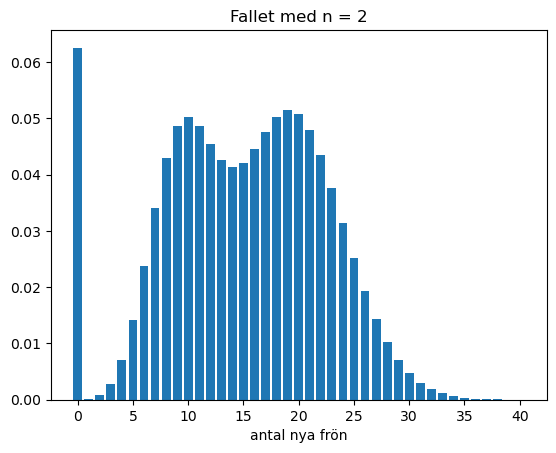

In [23]:
# Teoretisk fördelning med satsen om total slh.
n = 2
p = 0.75
mu = 10
y = np.arange(4*mu+1)

pY = stats.poisson.pmf(y,0*mu) * stats.binom.pmf(0, n, p)        #fallet X=0
pY = pY + stats.poisson.pmf(y,1*mu) * stats.binom.pmf(1, n, p)   #fallet X=1
pY = pY + stats.poisson.pmf(y,2*mu) * stats.binom.pmf(2, n, p)   #fallet X=2

#%% Plot för n=2
plt.bar(y, pY)
plt.xlabel('antal nya frön')
plt.title('Fallet med n = '+ str(n))

**Uppgift:** Ser fördelningen ut som du hade väntat dig? Stämmer det med simuleringarna?

För det allmänna fallet, exempelvis $n = 7$, kan vi använda en **for**-sats för att beräkna summan över $k$:

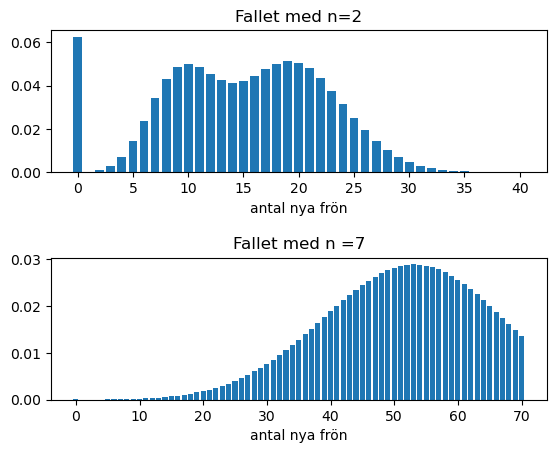

In [24]:
# Allmänt n med for-loop
n = 7
y_n = np.arange(n*mu+1)
pY_n = 0
for k in range(n+1):  #range är heltal 0<=k<n+1
    pY_n = pY_n + stats.poisson.pmf(y_n,k*mu) * stats.binom.pmf(k, n, p)

# Plot för båda fallen
ax = plt.subplot(211)
ax.bar(y, pY)
ax.set_xlabel('antal nya frön')
ax.set_title('Fallet med n=2')

ax = plt.subplot(212)
ax.bar(y_n, pY_n)
ax.set_xlabel('antal nya frön')
ax.set_title('Fallet med n =' + str(n))

#justera plottar så att texten inte överlappar
plt.subplots_adjust(hspace=0.6)

## Bivariat och marginal fördelning
Funktionen **harvest.py** ritar upp sannolikhetsfunktionen för $Y$ (dvs marginalfördelningen) och den gemensamma fördelningen för $X$ och $Y$ i en modell där

$Y|X=x\in \text{Po}(\mu\cdot x)$ och $X\in \text{Bin}(n,p)$

 för valfria värden på $n$, $p$ och $\mu$. Och den gemensamma fördelningen för antalet frön som gror, $X$, och antalet nya frö som skördas, $Y$. är

$p_{X,Y}(k,l) = p_{Y|X=k}(l)\cdot p_X(k), \qquad k = 0,1,...,n;\; l = 0,1,2,3,...$

In [25]:
help(harvest)

Help on function harvest in module harvest:

harvest(n, p, mu, y_cond=None)
    Plot densities for binomial sum of Poisson

    Plots the joint density for the number of harvested seeds (Y) and the
    number of original seeds that grew (X); the marginal density for the
    number of harvested seeds (Y); and, if y is given, the conditional
    density for the number of original seeds that grew (X|Y=y).

    The model is
      X ~ Bin(n,p)
    and, assuming X=k,
      Y = sum_i^k Z_i ~ Po(k*mu)
    where the number of harvested seeds for each original seed that grew is
      Z_i ~ Po(mu)

    Parameters
    ----------
    n : Positive integer
        Number of seeds to consider
    p : Number in 0 to 1
        Probability of growth
    mu : Positive number
         Mean value of yield for each seed that grows.
    y_cond : Positive number, optional
        Observed yield. If given, also compute conditional distribution for
        the number of seeds that grew, given yield.
        The 

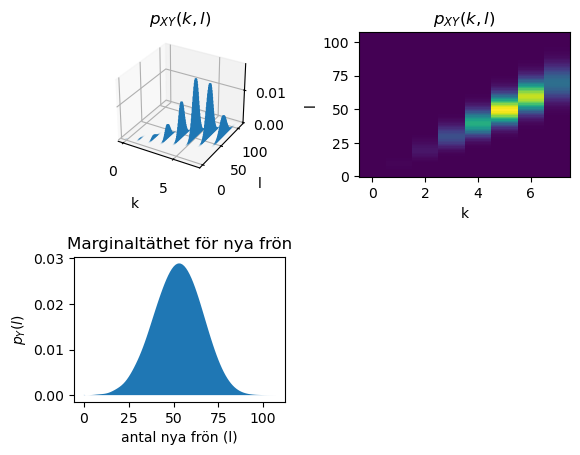

In [ ]:
fig = harvest(n, p, mu)

**Mozquizto:**  Experimentera med olika värden på $n$, $p$ och $\mu$. Vad händer om antalet planterade frö, $n$, minskar eller ökar? Om grobarheten, $p$, minskar eller ökar? Om medelantalet nya frön
per frö som gror, $\mu$, minskar eller ökar?

**Uppgift:** Vad händer om grobarheten är 100%?

**Uppgift:** Kan du få marginalfördelningen att se normalfördelad ut?

 **Mozquizto:** Experimentera med olika värden på $n$, $p$ och $\mu$. Hur hänger den bivariata sannolikhetsfunktionen, $p_{X|Y}(k,l)$, ihop med marginalsannolikheten, $p_Y(l)$?


## Bivariat fördelning och betingad fördelning
Givet den gemensamma sannolikhetsfunktionen kan vi också räkna ut den betingade fördelningen för hur många frön som grott givet att vi vet skördeutfallet

$p_{X|Y=l}(k) = \frac{p_{X,Y}(k,l)}{p_Y(l)} = \frac{p_{Y|X=k}(l)\cdot p_X(k)}{p_Y(l)},\qquad k = 0,1,...,n$

Funktionen kan också illustrera den betingade sannolikhetsfunktionen om vi har skördat $y = 25$ frö om den anropas med en extra parameter (vad vi betingar på)

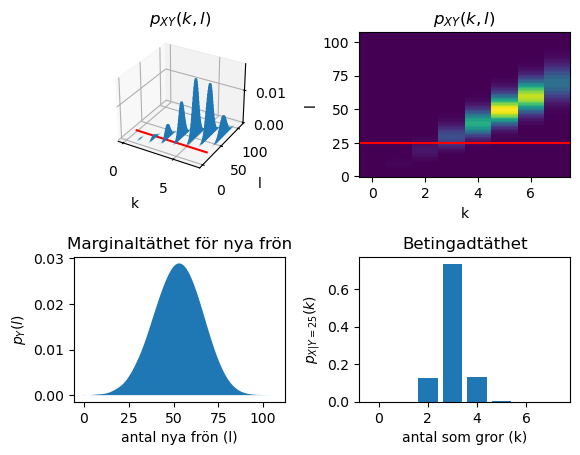

In [28]:
fig = harvest(n, p, mu, y_cond=25)

**Mozquizto:** Experimentera med olika värden på $n$, $p$, $\mu$ och observerat skördeutfall $y$. Hur
hänger den bivariata sannolikhetsfunktionen, $p_{X,Y}(k,l)$, ihop med den betingade sannolikheten, $p_{X|Y=l}(k)$?

**Mozquizto:** Vad är det troligaste antalet frö som grott (högst betingad sannolikhet) givet att man skördade 50 frön?

# Centrala gränsvärdessatsen
Vi skall nu titta lite närmare på Centrala Gränsvärdessatsen (CGS). 

## Summa av Poisson
Vi börjar med en liten simulering från en känd fördelning, två slumpmässiga obervationer $x_1$, $x_2$ från $X\in \text{Po}(\mu)$ där $\mu = 3$. Vi ska sedan beräkna medelvärdet $\bar{x}$ och se hur nära väntevärdet $\mu$ det hamnar.

In [30]:
mu = 3                              # det sanna mu-värdet
x = stats.poisson.rvs(mu, size=10)    # simulera 10 Po(mu)-slumptal
x = x.reshape((2,5))                # organisera som en 2x5-matris
print(x)
xmedel = x.mean(axis=0)            # 5 medelvärden av 2 Po-variabler var
print(xmedel)

[[5 5 4 4 0]
 [2 0 5 4 1]]
[3.5 2.5 4.5 4.  0.5]


**Uppgift:**  Gör om simuleringen och medelvärdesberäkningen några gånger. Verkar medelvärdet variera mindre än de enskilda observationerna? Borde den det? I så fall, hur mycket mindre?

Låt oss göra om simuleringarna ett stort antal gånger så vi får bättre uppfattning om hur medelvärdet beter sig:

Text(0.5, 1.0, 'Medelvärde av 2')

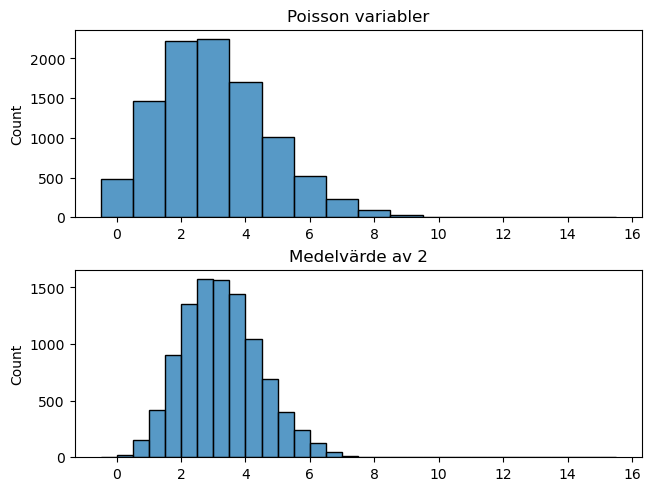

In [31]:
mu = 3
n = 2        # antal termer i medelvärdet
M = 10000        # antal simuleringar
x = stats.poisson.rvs(mu, size=n*M)   # simulera n*m Po(mu)-slumptal
x = x.reshape((n,M))                # organisera som en nxM-matris
xmedel = x.mean(axis=0)             # M st medelvärden

#definiera en gemensam binrange för jämförelse
binrange = (-0.5,5*mu+0.5)
#subplots
fig, axs = plt.subplots(2, 1, constrained_layout=True)
# histogram över de Mst x[0,:]-värdena (Poisson)
sns.histplot(x[0,:], binwidth=1, binrange=binrange, ax=axs[0])
axs[0].set_title('Poisson variabler')
# histogram över de Mst x-medelvärdena
sns.histplot(xmedel, binwidth=0.5, binrange=binrange, ax=axs[1])
axs[1].set_title('Medelvärde av ' + str(n))

**Uppgift:** Experimentera med lite olika värden på $n$ och se vad som händer med medelvärdet. Du kan behöva ändra klassbredden, **binwidth** i det undre histogrammet för att se något.

**Mozquizto:** Jämför variationen hos de enskilda observationerna i den övre figuren och variationen för skattningarna i den undre figuren. Hur ändrar sig variationen hos observationernavnär vi ändrar $n$?

**Uppgift:** Experimentera med $\text{Po}(3)$-fördelningen. Hur ser approximationen ut för olika $n$ (och $\mu$)?

**Uppgift:** För små $n$ (eller $\mu$) kan normalapproximationen uppenbarligen bli negativ. Blir $\bar{X}_n$ någonsin negativ, om $X_i$ är Poisson-fördelade?

## Medel av andra fördelningar
Enligt centrala gränsvärdessatsen vet vi att $\sum X_i$ och därmed också medelvärdet $\bar{X}$ blir normalfördelat om vi summerar tillräckligt många variabler; **oavsett** vilken fördelning $X_i$ har. Vi undersöker nu hur CGS fungerar för medelvärde av exponentialfördekade variabler.

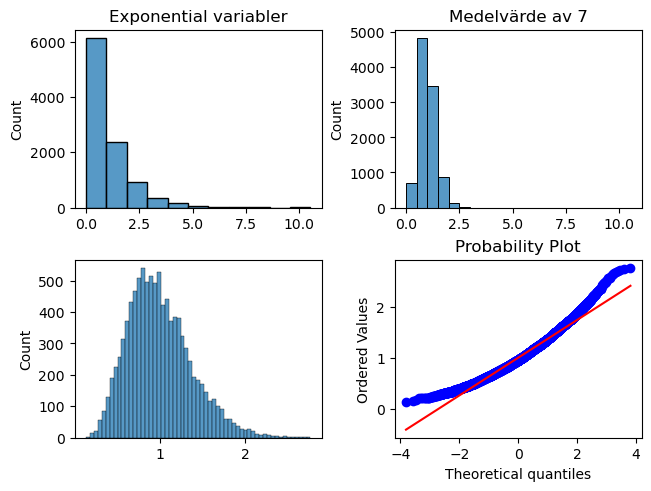

In [32]:
n = 7        # antal termer i medelvärdet
M = 10000        # antal simuleringar
x = stats.expon.rvs(scale=1, size=n*M)   # simulera exponential
x = x.reshape((n,M))                   # n x M-matris. x1 i första raden, xn i sista.
xmedel = x.mean(axis=0)                # M st medelvärden

#definiera en gemensam binrange för jämförelse
binrange = (0, np.max(x))
#subplots
fig, axs = plt.subplots(2, 2, constrained_layout=True)
# histogram över de Mst x[0,:]-värdena (Poisson)
sns.histplot(x[0,:], binwidth=1, binrange=binrange, ax=axs[0,0])
axs[0,0].set_title('Exponential variabler')
# histogram över de Mst x-medelvärdena i samma skala som för x
sns.histplot(xmedel, binwidth=0.5, binrange=binrange, ax=axs[0,1])
axs[0,1].set_title('Medelvärde av ' + str(n))
# histogram över de Mst x-medelvärdena i fri skala
sns.histplot(xmedel, ax=axs[1,0])
axs[0,1].set_title('Medelvärde av ' + str(n))
# kvantilplot av medelvärdena för att undersöka normalfördelning
fig = stats.probplot(xmedel, dist="norm", fit=True, plot=axs[1,1])

**Mozquizto:** Undersök hur några andra fördelningar (t.ex. binomial-, exponential- och rektangelfördelningarna) beter sig. Hur stort måste $n$ vara för att normalapproximationen ska bli bra? Skiljer det sig mellan fördelningarna?